In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.applications.vgg16 import  VGG16

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainPath="/content/drive/MyDrive/deeplearning/final odev/chest_xray/train/"
testPath="/content/drive/MyDrive/deeplearning/final odev/chest_xray/test/"

trainDataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    subset='training'
)

valGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1
)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
base_model = VGG16(input_shape = (224,224,3), include_top= False)
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
out = Dense(3, activation='softmax')(x)

model = Model(inputs= base_model.inputs, outputs = out)

model.summary()

print(len(model.layers))

for layer in model.layers:
  print(layer.name, " ", layer.trainable)

for layer in model.layers[:10]:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer='SGD', metrics=['accuracy'])
history = model.fit(
    trainGen,
    steps_per_epoch= trainGen.samples//128,
    validation_data = valGen,
    epochs =20,
    validation_steps = valGen.samples//128
)

Epoch 1/20
36/36 [==============================] - 1416s 38s/step - loss: 2.8365 - accuracy: 0.4539 - val_loss: 0.8176 - val_accuracy: 0.6992
Epoch 2/20
36/36 [==============================] - 74s 2s/step - loss: 0.8480 - accuracy: 0.6360 - val_loss: 0.9132 - val_accuracy: 0.5078
Epoch 3/20
36/36 [==============================] - 58s 2s/step - loss: 0.7902 - accuracy: 0.6333 - val_loss: 0.6187 - val_accuracy: 0.7637
Epoch 4/20
36/36 [==============================] - 58s 2s/step - loss: 0.7038 - accuracy: 0.6797 - val_loss: 0.7213 - val_accuracy: 0.6484
Epoch 5/20
36/36 [==============================] - 58s 2s/step - loss: 0.6578 - accuracy: 0.7001 - val_loss: 0.5841 - val_accuracy: 0.8105
Epoch 6/20
36/36 [==============================] - 58s 2s/step - loss: 0.6153 - accuracy: 0.7234 - val_loss: 0.5010 - val_accuracy: 0.8164
Epoch 7/20
36/36 [==============================] - 58s 2s/step - loss: 0.5784 - accuracy: 0.7369 - val_loss: 0.5304 - val_accuracy: 0.7109
Epoch 8/20
36/36 

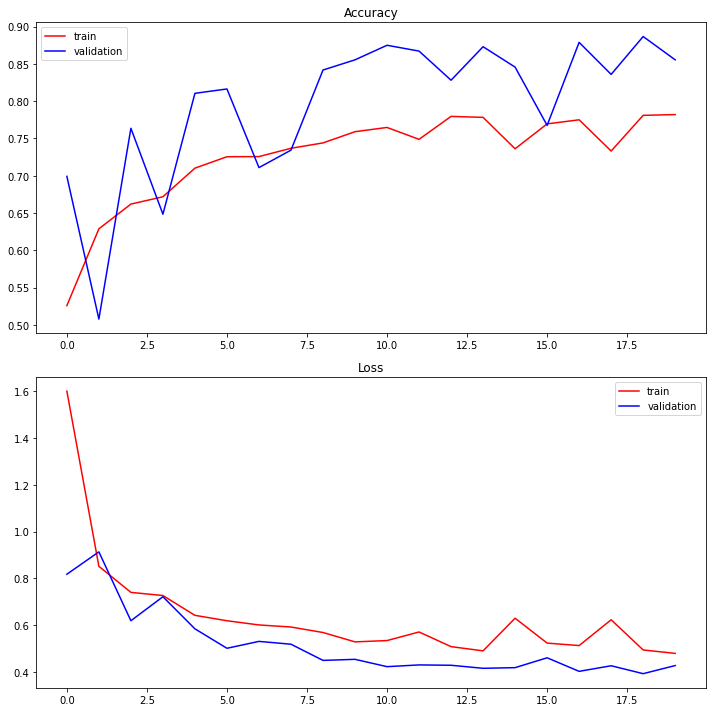

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')


plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
score = model.evaluate(valGen)
print("Val Loss", score[0])
print("Val Accuracy", score[1]*100)

score = model.evaluate(trainGen)
print("Train Loss", score[0])
print("Train Accuracy", score[1]*100)

score = model.evaluate(testGen)
print("Test Loss", score[0])
print("Test Accuracy", score[1]*100)

5/5 [==============================] - 8s 2s/step - loss: 0.4240 - accuracy: 0.8580
Val Loss 0.42397451400756836
Val Accuracy 85.79654693603516
37/37 [==============================] - 53s 1s/step - loss: 0.5024 - accuracy: 0.7735
Train Loss 0.5023829936981201
Train Accuracy 77.35087871551514
624/624 [==============================] - 156s 249ms/step - loss: 0.6819 - accuracy: 0.8061
Test Loss 0.6818809509277344
Test Accuracy 80.60897588729858


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

scoreSeg = model.evaluate_generator(testGen,624)
testGen.reset()
predict = model.predict_generator(testGen,624)

len(predict) == len(testGen)


print('tahmin Değerleri')
print(np.argmax(predict, axis=1))
print('*************************************************************************')

print('Gerçek Değerleri')
print(testGen.classes)

print(testGen.class_indices)

pred=np.argmax(predict, axis=1)
print('*************************************************************************')
print("Confusion Matrix")
print(confusion_matrix(testGen.classes,pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


tahmin Değerleri
[0 1 2 1 1 0 0 1 1 0 2 1 1 1 0 0 2 2 2 1 1 2 1 2 1 1 2 0 2 1 2 2 2 0 2 1 1
 1 1 1 2 2 1 2 0 1 1 1 1 1 0 1 1 2 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 2 1
 1 0 1 1 0 1 2 2 0 2 2 0 0 1 2 2 2 2 1 2 2 0 1 1 1 0 1 0 0 1 1 2 0 1 1 2 1
 0 0 1 2 0 2 1 1 1 2 0 1 2 0 1 2 2 2 0 2 1 2 0 2 1 0 1 2 2 0 0 0 1 2 0 2 2
 2 1 1 2 1 2 0 1 0 1 1 1 1 1 2 1 2 1 2 1 0 1 1 2 1 0 1 0 0 0 2 0 0 2 1 1 1
 2 2 2 0 1 0 0 0 1 1 2 0 2 0 2 2 2 1 1 0 1 2 0 1 2 2 2 0 1 1 1 1 1 1 1 1 2
 0 2 2 2 0 2 2 1 0 2 0 1 2 2 0 1 0 1 2 1 1 2 0 2 2 0 1 0 0 1 0 2 1 2 2 2 1
 1 2 2 1 1 0 1 2 2 1 1 1 1 2 2 2 1 1 0 2 1 1 1 2 0 1 0 0 1 0 1 2 0 2 2 2 1
 1 1 2 0 2 1 0 1 0 1 2 2 0 1 2 1 1 0 2 0 1 2 2 1 2 1 0 2 0 0 0 1 2 1 1 0 1
 1 2 0 2 2 2 1 2 1 1 1 2 2 1 0 2 0 1 1 1 1 1 1 0 1 2 1 0 1 1 2 1 2 1 1 1 0
 2 1 2 0 2 2 1 0 1 1 1 1 1 1 1 1 0 2 1 0 0 0 2 0 2 1 2 2 1 2 0 2 0 1 2 2 0
 0 0 2 0 0 2 0 2 1 0 1 2 1 0 2 1 1 0 0 2 1 0 0 1 2 2 1 0 2 1 1 1 2 0 0 0 1
 2 2 1 1 1 0 2 2 0 1 0 2 1 2 2 2 0 2 1 2 2 1 2 1 1 2 1 0 1 1 2 2 2 0 0 0 2
 2 1 1 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Results")
print(classification_report(testGen.classes,pred,target_names=(sorted(testGen.class_indices.keys()))))

from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(testGen.classes, np.argmax(predict, axis=1)))

print('Test accuracy :', '%', scoreSeg[1]*100)

Results
                    precision    recall  f1-score   support

            NORMAL       0.39      0.26      0.31       234
bacteria pneumonia       0.40      0.40      0.40       242
   virus pneumonia       0.30      0.45      0.36       148

          accuracy                           0.36       624
         macro avg       0.36      0.37      0.36       624
      weighted avg       0.37      0.36      0.36       624

Accuracy: 0.3605769230769231
Test accuracy : % 80.60897588729858
